## Data Understanding:

Data Description:

| Column Name        | Description                                                                                   |
|-------------------|-----------------------------------------------------------------------------------------------|
| Airline            | Name of the airline operating the flight.                                                    |
| Date_of_Journey    | Date when the flight was scheduled.                                                          |
| Source             | Departure city of the flight.                                                                |
| Destination        | Arrival city of the flight.                                                                  |
| Route              | Path the flight takes including all layovers.                                                |
| Dep_Time           | Flight departure time.                                                                       |
| Arrival_Time       | Flight arrival time.                                                                         |
| Duration           | Total flight duration.                                                                       |
| Total_Stops        | Number of stops during the journey.                                                         |
| Additional_Info    | Extra information about the flight (e.g., in-flight meal, no info).                          |
| Price              | Cost of the flight (target variable).                                                       |


In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


In [3]:
# Read the data from excel sheet
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.to_parquet('Data_Train.parquet', engine='pyarrow') 

In [5]:
# Check the shape 
df.shape

(10683, 11)

In [6]:
# Quick look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Check summary statistics for numeric columns
df.describe().round(2)

,Price
count,10683.00
mean,9087.06
std,4611.36
min,1759.00
25%,5277.00
50%,8372.00
75%,12373.00
max,79512.00


In [8]:
# check the mode of categorical columns 
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
df.duplicated().sum()

np.int64(220)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
# Check missing values 
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [14]:
# Drop missing value 
df.dropna(axis=0, inplace=True)

In [15]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Cleaning 

In [16]:
df.drop(['Additional_Info' , 'Arrival_Time' , 'Route'] , inplace=True , axis=1 )

In [17]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [18]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df.drop('Dep_Time', axis=1, inplace=True)

C:\Users\connect\AppData\Local\Temp\ipykernel_13240\2747847008.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour


In [19]:
df['Dep_Hour'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3], dtype=int32)

In [20]:
# Convert to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract day and month
df['Journey_Day'] = df['Date_of_Journey'].dt.day_name()
df['Journey_Month'] = df['Date_of_Journey'].dt.month_name()

# Weekend flag (Saturday=5, Sunday=6)
df['Is_Weekend'] = df['Date_of_Journey'].dt.dayofweek.isin([5 , 6]).astype(int)

# Drop original column
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [21]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Hour,Journey_Day,Journey_Month,Is_Weekend
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,22,Sunday,March,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,Wednesday,May,0
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,Sunday,June,1
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,18,Sunday,May,1
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,16,Friday,March,0


In [22]:
## Convert Duration to minutes
def to_minute(full_dur):
    hours = 0
    minutes = 0
    if 'h' in full_dur:
        hours = int(full_dur.split('h')[0])
    if 'm' in full_dur:
        minutes = int(full_dur.split('m')[0].split()[-1])
    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(to_minute)


In [24]:
for col in ['Airline' , 'Source' ,'Destination']:
   print(df[col].value_counts())
   print(df[col].nunique())
   print('--' * 50)


Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
12
----------------------------------------------------------------------------------------------------
Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
5
----------------------------------------------------------------------------------------------------
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtyp

## Data Analysis:

## What is the distribution of flight prices?

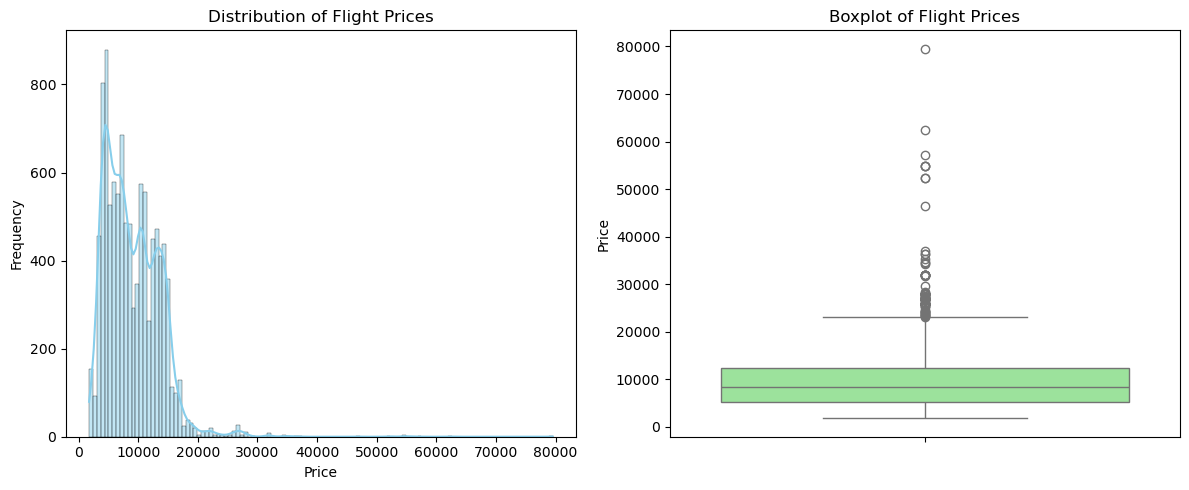

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(y=df['Price'], color='lightgreen')
plt.title('Boxplot of Flight Prices')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


## What is the distribution of duration?

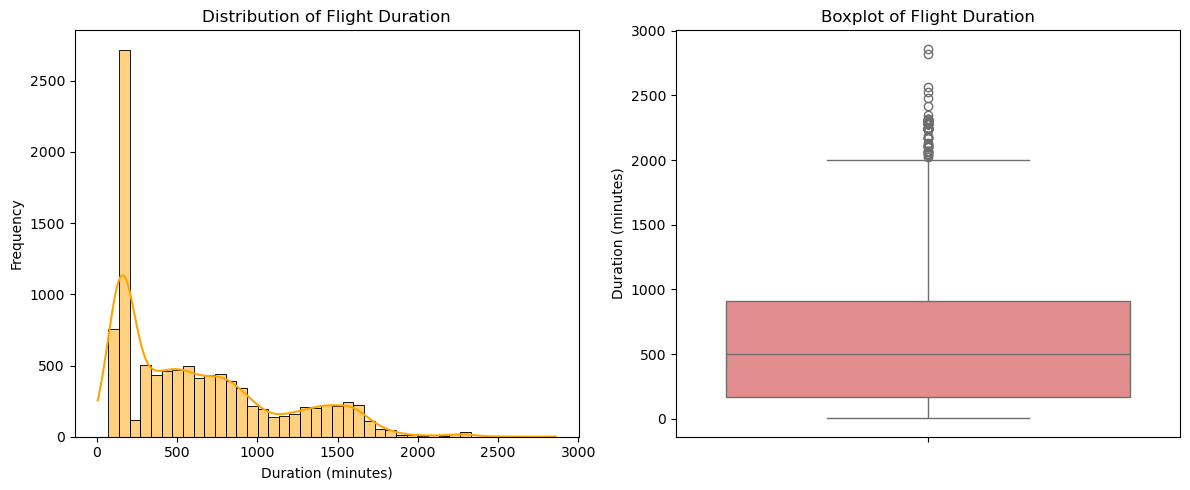

In [26]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 1)  
sns.histplot(df['Duration'], kde=True, color='orange')
plt.title('Distribution of Flight Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(y=df['Duration'], color='lightcoral')
plt.title('Boxplot of Flight Duration')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()


## Which airline operates the most flights?

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count flights per airline
airline_counts = df['Airline'].value_counts()

In [28]:
import plotly.express as px
fig = px.bar(
    x=airline_counts.index,
    y=airline_counts.values,
    text=airline_counts.values, 
    labels={'x':'Airline', 'y':'Number of Flights'},
    title='Number of Flights Operated by Each Airline')
fig.update_traces(textposition='inside', marker_color='indigo') 
fig.update_layout(xaxis_tickangle=-45) 
fig.show()


## Wha are the most frequent months??

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count flights per month
month_counts = df['Journey_Month'].value_counts()
month = month_counts.reset_index()
month_labels = month['Journey_Month'].unique()

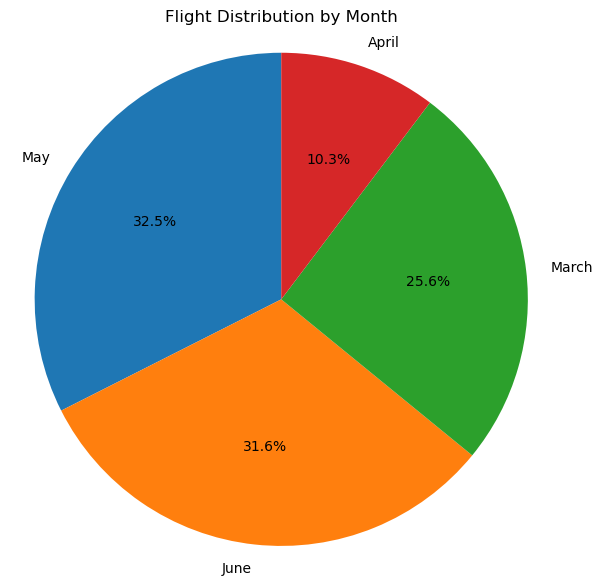

In [30]:
plt.figure(figsize=(7, 7))
plt.pie(
    month_counts.values,
    labels=month_labels,
    autopct='%1.1f%%',
    startangle=90)

plt.title('Flight Distribution by Month')
plt.axis('equal') 
plt.show()

## How does ticket price vary with total stops?

In [31]:
import plotly.express as px

fig = px.box(
    df, 
    x='Total_Stops', 
    y='Price',
    points="all", 
    color='Total_Stops', 
    title='Price vs Number of Stops')
fig.update_layout(
    xaxis_title='Total Stops',
    yaxis_title='Price')
fig.show()


## Correlation Between the duration & price ?

In [32]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Duration',
    y='Price',
    opacity=0.5,    
    title='Duration vs Price',
    labels={'Duration':'Duration (minutes)', 'Price':'Price'})
fig.show()

## Median Flight Price by Departure Hour

In [33]:
# Aggregate by median 
hour_price = (df.groupby('Dep_Hour')['Price'].median().reset_index())

In [34]:
import plotly.express as px

# Plot
fig = px.line(
    hour_price,
    x='Dep_Hour',
    y='Price',
    markers=True,
    title='Median Flight Price by Departure Hour')

fig.update_layout(
    xaxis_title='Departure Hour',
    yaxis_title='Median Price')
fig.show()


## Is weekend travel more expensive?

In [35]:
import plotly.express as px
fig = px.box(
    df,
    x='Is_Weekend',
    y='Price',
    points="all",             
    color='Is_Weekend',     
    color_discrete_map={0: 'skyblue', 1: 'orange'},
    labels={'Is_Weekend':'Day Type', 'Price':'Price'},
    title='Flight Price: Weekend vs Weekday')
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[0,1],
        ticktext=['Weekday', 'Weekend']))
fig.show()


## Price distributions of different airlines

In [36]:
import plotly.express as px

fig = px.box(
    df,
    x='Airline',
    y='Price',
    title='Flight Price Distribution by Airline',)

fig.update_layout(
    xaxis_title='Airline',
    yaxis_title='Price',
    xaxis_tickangle=45)

fig.show()


## What are the frequencies of Flight Routes?

In [37]:
import plotly.express as px
route_counts = df.groupby(['Source', 'Destination']).size().sort_values(ascending=False)
top_routes = route_counts.head(6)

# Plot
fig = px.bar(
    x=[f"{src} → {dst}" for src, dst in top_routes.index],
    y=top_routes.values,
    text=top_routes.values,
    title=' Flight Routes',
    labels={'x':'Route', 'y':'Number of Flights'},
    color=top_routes.values
)
fig.update_traces(textposition='inside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### Average duration in hours for the 3 top routes (Source → Destination) & average price :

In [38]:
import plotly.express as px

# Aggregate    # convert minutes to hours
route_stats = df.groupby(['Source', 'Destination']).agg(
    Avg_Price=('Price', 'median'),
    Avg_Duration=('Duration', lambda x: x.mean()/60),
    Count=('Price', 'count')                          
).sort_values(by='Count', ascending=False)

# Take 3 top most frequent routes
top_routes = route_stats.head(3)

# Plot
fig = px.scatter(
    top_routes,
    x='Avg_Duration',
    y='Avg_Price',
    size='Count',               
    color=top_routes.index.map(lambda x: f"{x[0]} → {x[1]}"),
    hover_name=top_routes.index.map(lambda x: f"{x[0]} → {x[1]}"),
    title='Top 3 Flight Routes: Price vs Average Duration',
    labels={'Avg_Duration':'Average Duration (hours)', 'Avg_Price':'Average Price'}
)

fig.show()


## How do Duration and Number of Stops together affect Flight Price?

In [39]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Duration',
    y='Price',
    color='Total_Stops',
    title='Effect of Duration and Stops on Flight Price',
    labels={'Duration':'Duration (minutes)', 'Price':'Price'}
)
fig.show()


### Which departure hour ranges are most expensive for long flights on weekdays?

In [40]:
import plotly.express as px

# Filter weekdays only
weekday_df = df[df['Is_Weekend'] == 0]

long_flights = weekday_df[weekday_df['Duration'] > weekday_df['Duration'].median()]

fig = px.box(
    long_flights,
    x='Dep_Hour',
    y='Price',
    title='Weekday Flight Prices by Departure Hour (Long Flights Only)',
    labels={'Dep_Hour':'Departure Hour', 'Price':'Price'}
)

fig.show()


In [41]:
## Long weekday flights departing at night are the most expensive.

### How does the average flight price vary by departure hour across the routes on weekdays?

In [42]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# weekdays
weekday_df = df[df['Is_Weekend'] == 0]

# routes
routes = (
    weekday_df
    .groupby(['Source', 'Destination'])
    .size()
    .sort_values(ascending=False)
    .head(6)
    .index
)


In [43]:
# Create my grid
fig = make_subplots(
    rows=2,
    cols=3,
    subplot_titles=[f"{src} → {dst}" for src, dst, *_ in top_routes],
    horizontal_spacing=0.12,   
    vertical_spacing=0.18     
)

row, col = 1, 1

for src, dst in routes:
    
    route_df = weekday_df[
        (weekday_df['Source'] == src) &
        (weekday_df['Destination'] == dst)
    ]
    
    hourly_price = (
        route_df
        .groupby('Dep_Hour')['Price']
        .mean()
        .reset_index()
    )
    
    fig.add_trace(
        go.Scatter(
            x=hourly_price['Dep_Hour'],
            y=hourly_price['Price'],
            mode='lines+markers',
            marker=dict(size=6)
        ),
        row=row,
        col=col
    )
    
    col += 1
    if col > 3:
        col = 1
        row += 1


fig.update_layout(
    height=900,             
    width=1200,
    title='Weekday Flight Prices by Departure Hour (Top Routes)',
    showlegend=False
)


fig.update_xaxes(
    dtick=2,                 
    title_text='Departure Hour'
)

fig.update_yaxes(
    title_text='Average Price'
)

fig.show()


In [44]:
cat_cols = df.select_dtypes(include='object')
for col in cat_cols:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print(f'Number of unique values: {df[col].nunique()}')
    print('--' * 50)

Column: Airline
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Number of unique values: 12
----------------------------------------------------------------------------------------------------
Column: Source
Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
Number of unique values: 5
----------------------------------------------------------------------------------------------------
Column: Destination
Destination
Cochin       4345
Banglo

In [45]:
columns_rare = ['Total_Stops', 'Airline']
threshold_Airline = 200  
threshold_stops =  1520  

for col in columns_rare:
    counts = df[col].value_counts()
    rare_Airline  = counts[counts <= threshold_Airline].index
    rare_stops = counts[counts <= threshold_stops].index
    if col in ['Total_Stops']:
       df[col] = df[col].replace(rare_stops, '2 or more')
    else:
       df[col] = df[col].replace(rare_Airline, 'Other')


In [46]:
cat_cols = df.select_dtypes(include='object')
for col in cat_cols:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print(f'Number of unique values: {df[col].nunique()}')
    print('--' * 50)

Column: Airline
Airline
Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
Other                 217
Name: count, dtype: int64
Number of unique values: 8
----------------------------------------------------------------------------------------------------
Column: Source
Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
Number of unique values: 5
----------------------------------------------------------------------------------------------------
Column: Destination
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
Number of unique values: 6
----------------------------------------------------------------------------------------------------
Column: Total_Stops
Total_Stops
1 stop       5625
non-stop 

In [47]:
# Save the data as csv 
cleaned_data = df.to_csv('Cleaned_data.csv')

In [48]:
# save the data as parquet
df.to_parquet('Cleaned_data.parquet', engine='fastparquet' ,  index=False)  

In [49]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(len(outliers))


94


In [50]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1

# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = df[(df['Duration'] < lower_bound) | (df['Duration'] > upper_bound)]
print(len(outliers))

75


## Data Preprocessing

In [51]:
x = df.drop('Price',  axis = 1)
y = df['Price']

## Numerical Pipeline 

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
num_pipe = Pipeline( steps= [('scaling' , robust)])
num_pipe

,steps,"[('scaling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


## Categorical Pipeline 

#### OneHotEncoder

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first' , sparse_output= False)
ohe_Pipeline = Pipeline(steps = [('ohe' , ohe)])
ohe_Pipeline

,steps,"[('ohe', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None


#### OrdinalEncoder

In [54]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(
    categories=[['non-stop', '1 stop', '2 or more']],
    dtype=int
)
ordinal_pipe = Pipeline(steps=([('ordinal_encoder' , ordinal_encoder)]))
ordinal_pipe

,steps,"[('ordinal_encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,"[['non-stop', '1 stop', ...]]"
,dtype,<class 'int'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


## ColumnTransformer

In [55]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers = ( [ ('Num_trans' , num_pipe , ['Duration', 'Dep_Hour']) , 
                                    ('hot_trans' , ohe_Pipeline , ['Airline', 'Source', 'Destination','Journey_Day','Journey_Month'])    ,
                                    ('ord_trans' , ordinal_pipe , ['Total_Stops']) ]))
preprocessing

,transformers,"[('Num_trans', ...), ('hot_trans', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


## Machine Learning

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score


In [57]:
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge(alpha=1.0)),
    ('Lasso', Lasso(alpha=0.001)),
    ('KNN', KNeighborsRegressor()),
    ('DT', DecisionTreeRegressor(random_state=42)),
    ('RF', RandomForestRegressor(random_state=42, n_estimators=200)),
    ('GB', GradientBoostingRegressor(random_state=42)),
    ('XGB', XGBRegressor(
        random_state=42,
        objective='reg:squarederror',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5
    ))
]


In [58]:
from sklearn.model_selection import cross_validate
for name, model in models:

    model_pipeline = Pipeline(steps=[
        ('Preprocessing', preprocessing),
        ('Model', model)])

    cv = cross_validate(model_pipeline, x , y,scoring={
        'MAE': 'neg_mean_absolute_error',
        'RMSE': 'neg_root_mean_squared_error',
        'R2': 'r2' }, cv=5, return_train_score=True, n_jobs=-1 )

    print(name)
    print('Train MAE:', round(abs(cv['train_MAE']).mean() , 3))
    print('Test MAE :', round(abs(cv['test_MAE']).mean(), 3))
    print('Train RMSE:', round(abs(cv['train_RMSE']).mean() , 3))
    print('Test RMSE :', round(abs(cv['test_RMSE']).mean() , 3))
    print('Train R2:', round(cv['train_R2'].mean() , 3))
    print('Test R2 :', round(cv['test_R2'].mean(),3))
    print('Training Time:', round(cv['fit_time'].sum(), 3))
    print('-' * 50)


LR
Train MAE: 2002.911
Test MAE : 2009.226
Train RMSE: 3033.299
Test RMSE : 3040.055
Train R2: 0.57
Test R2 : 0.567
Training Time: 1.615
--------------------------------------------------
Ridge
Train MAE: 2002.177
Test MAE : 2008.467
Train RMSE: 3033.317
Test RMSE : 3040.04
Train R2: 0.57
Test R2 : 0.567
Training Time: 1.576
--------------------------------------------------
Lasso
Train MAE: 2002.907
Test MAE : 2009.222
Train RMSE: 3033.299
Test RMSE : 3040.055
Train R2: 0.57
Test R2 : 0.567
Training Time: 21.799
--------------------------------------------------
KNN
Train MAE: 1332.407
Test MAE : 1653.65
Train RMSE: 2135.862
Test RMSE : 2630.784
Train R2: 0.787
Test R2 : 0.675
Training Time: 0.963
--------------------------------------------------
DT
Train MAE: 523.334
Test MAE : 1719.425
Train RMSE: 1188.888
Test RMSE : 3225.488
Train R2: 0.934
Test R2 : 0.513
Training Time: 4.058
--------------------------------------------------
RF
Train MAE: 784.091
Test MAE : 1512.808
Train RMSE:

## Hyperparameter tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_param_dist = {
    'Model__n_estimators': [200, 300, 400, 600],
    'Model__max_depth': [3, 4, 5, 6, 7],
    'Model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'Model__subsample': [0.6, 0.7, 0.8, 1.0],
    'Model__colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'Model__gamma': [0, 1, 5]
}
xgb_pipeline = Pipeline([('Preprocessing', preprocessing),('Model', xgb)])

xgb_random = RandomizedSearchCV(xgb_pipeline, param_distributions=xgb_param_dist, n_iter=25, scoring='r2', cv=5, verbose=2, random_state=42, n_jobs=-1)
# try 25 different parameter sets
# n_iter = 25 / cv = 5 / 25 × 5 = 125 model trainings
xgb_random

,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'Model__colsample_bytree': [0.6, 0.7, ...], 'Model__gamma': [0, 1, ...], 'Model__learning_rate': [0.01, 0.03, ...], 'Model__max_depth': [3, 4, ...], ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [60]:
# Fit on my data
xgb_random.fit(x, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'Model__colsample_bytree': [0.6, 0.7, ...], 'Model__gamma': [0, 1, ...], 'Model__learning_rate': [0.01, 0.03, ...], 'Model__max_depth': [3, 4, ...], ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [61]:
print("Best XGB params:", xgb_random.best_params_)

Best XGB params: {'Model__subsample': 0.8, 'Model__n_estimators': 400, 'Model__max_depth': 5, 'Model__learning_rate': 0.05, 'Model__gamma': 1, 'Model__colsample_bytree': 0.7}


In [62]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    xgb_random.best_estimator_,
    x, y,
    cv=5,
    scoring={
        'R2': 'r2',
        'MAE': 'neg_mean_absolute_error',
        'RMSE': 'neg_root_mean_squared_error'
    }
)

print("R2:", scores['test_R2'].mean())
print("MAE:", abs(scores['test_MAE']).mean())
print("RMSE:", abs(scores['test_RMSE']).mean())


R2: 0.7349815368652344
MAE: 1483.7345947265626
RMSE: 2377.582958984375


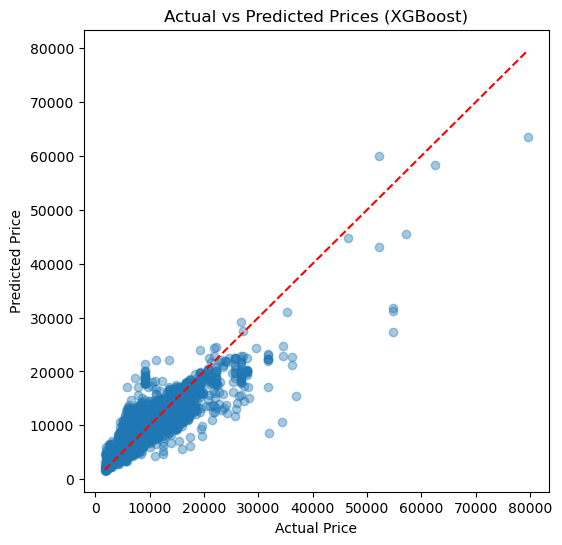

In [63]:
import matplotlib.pyplot as plt

y_pred = xgb_random.best_estimator_.predict(x)

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

rf = RandomForestRegressor(random_state=42)

rf_param_dist = {
    'Model__n_estimators': [200, 300, 500],
    'Model__max_depth': [None, 10, 20, 30],
    'Model__min_samples_split': [2, 5, 10],
    'Model__min_samples_leaf': [1, 2, 4],
    'Model__max_features': ['sqrt', 'log2']
}

rf_pipeline = Pipeline([('Preprocessing', preprocessing), ('Model', rf)])

rf_random = RandomizedSearchCV(rf_pipeline, rf_param_dist, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1, verbose=2)

In [65]:
rf_random.fit(x, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'Model__max_depth': [None, 10, ...], 'Model__max_features': ['sqrt', 'log2'], 'Model__min_samples_leaf': [1, 2, ...], 'Model__min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [66]:
print("Best RF params:", rf_random.best_params_)
print("Best RF R2:", rf_random.best_score_ )

Best RF params: {'Model__n_estimators': 200, 'Model__min_samples_split': 5, 'Model__min_samples_leaf': 1, 'Model__max_features': 'sqrt', 'Model__max_depth': 20}
Best RF R2: 0.6955837800800234


##### After hyperparameter tuning, Random Forest R² score is approximately 0.70 / XGBoost with R² of approximately 0.74

## Log Transformation

In [67]:
# Log-transform the target
y_log = np.log1p(df['Price'])

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# XGBoost model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# grid
xgb_param_dist = {
    'Model__n_estimators': [200, 300, 400, 600],
    'Model__max_depth': [4, 5, 6],  
    'Model__learning_rate': [0.03, 0.05], 
    'Model__subsample': [0.7, 0.8],        # best values from previous tuning
    'Model__colsample_bytree': [0.6, 0.7],
    'Model__gamma': [0, 1]            
}

# Pipeline
xgb_pipeline = Pipeline([
    ('Preprocessing', preprocessing),
    ('Model', xgb)
])


# RandomizedSearchCV
xgb_random_log= RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=20,         
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
xgb_random_log



,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'Model__colsample_bytree': [0.6, 0.7], 'Model__gamma': [0, 1], 'Model__learning_rate': [0.03, 0.05], 'Model__max_depth': [4, 5, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [69]:
# Fit the model
xgb_random_log.fit(x, y_log)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'Model__colsample_bytree': [0.6, 0.7], 'Model__gamma': [0, 1], 'Model__learning_rate': [0.03, 0.05], 'Model__max_depth': [4, 5, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [70]:
print("Best XGB Params:", xgb_random_log.best_params_)
print("Best CV R2 (log-scale):", xgb_random_log.best_score_)

Best XGB Params: {'Model__subsample': 0.8, 'Model__n_estimators': 400, 'Model__max_depth': 6, 'Model__learning_rate': 0.05, 'Model__gamma': 0, 'Model__colsample_bytree': 0.6}
Best CV R2 (log-scale): 0.8315694529818192


## Predict & Evaluate Final XGBoost Model

In [71]:
# Predict all flights (log scale)
log_preds = xgb_random_log.predict(x)  

# Inverse transform to original price
price_preds = np.expm1(log_preds)       


In [72]:
# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(df['Price'], price_preds)
mae = mean_absolute_error(df['Price'], price_preds)

print("R2 (original price):", r2)
print("MAE (original price):", mae)


R2 (original price): 0.8016462326049805
MAE (original price): 1235.8226318359375


## Save the model

In [73]:
import joblib
joblib.dump(xgb_random_log, "xgb_flight_model.pkl")

['xgb_flight_model.pkl']